In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy.stats import friedmanchisquare
import scikit_posthocs

In [43]:
for i in range(2):
    df = pd.concat(
        [pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_amine_ratio.joblib")[i]), 
        pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_amine_ratio_boost.joblib")[i])]
    ).pivot_table(index=["test_compound"], values="reciprocal_rank", columns="model")
    models = df.columns
    
    avg_ranks = np.mean(yield_to_ranking(df.to_numpy()), axis=0)
    avg_tau = np.mean(df.to_numpy(), axis=0)
    avg_tau_ranks = yield_to_ranking(np.mean(df.to_numpy(), axis=0))
    print(avg_tau)
    print(avg_tau_ranks)
    print(models)
    print()

[0.26437363 0.53484848 0.50703236 0.50540898 0.37110163 0.50384199
 0.4849026  0.51738981 0.43538223]
[9 1 3 4 8 5 6 2 7]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[0.31363636 0.78181818 0.59412305 0.51046832 0.54538567 0.70646168
 0.73292011 0.71858289 0.6077243 ]
[9 1 6 8 7 4 2 3 5]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')



In [47]:
for i in range(4):
    df = pd.concat(
        [pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_catalyst_ratio.joblib")[i]), 
        pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_catalyst_ratio_boost.joblib")[i])]
    ).pivot_table(index=["test_compound"], values="reciprocal_rank", columns="model")
    models = df.columns
    
    avg_ranks = np.mean(yield_to_ranking(df.to_numpy()), axis=0)
    avg_tau = np.mean(df.to_numpy(), axis=0)
    avg_tau_ranks = yield_to_ranking(np.mean(df.to_numpy(), axis=0))
    print(avg_tau)
    print(avg_tau_ranks)
    print(models)
    print()

[0.78030303 0.78030303 0.57828283 0.53282828 0.78787879 0.78030303
 0.73106061 0.77651515 0.61616162]
[4 3 8 9 1 2 6 5 7]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[0.74040404 0.77575758 0.68484848 0.57359307 0.69621212 0.74166667
 0.77575758 0.74166667 0.59935065]
[5 2 7 9 6 4 1 3 8]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[0.32521645 0.84090909 0.74545455 0.57121212 0.87121212 0.79545455
 0.84090909 0.79545455 0.76893939]
[9 3 7 8 1 5 2 4 6]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[0.12950938 0.66212121 0.74545455 0.58939394 0.5030303  0.76818182
 0.76818182 0.76818182 0.61666667]
[9 5 4 7 8 3 2 1 6]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object',

In [39]:
for i in range(2):
    df = pd.concat(
        [pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_amine_ratio.joblib")[i]), 
        pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_amine_ratio_boost.joblib")[i])]
    ).pivot_table(index=["test_compound"], values="kendall_tau", columns="model")
    models = df.columns
    # avg_ranks = np.mean(yield_to_ranking(df.to_numpy()), axis=0)
    avg_tau = np.mean(df.to_numpy(), axis=0)
    avg_tau_ranks = yield_to_ranking(np.mean(df.to_numpy(), axis=0))
    print(avg_tau)
    print(avg_tau_ranks)
    print(models)
    print()

[-0.22488038  0.29569378  0.30813397  0.30430622  0.05454545  0.28229665
  0.28995215  0.2937799   0.18660287]
[9 3 1 2 8 6 5 4 7]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[-0.28899522  0.38564593  0.39617225  0.31674641  0.15885167  0.38660287
  0.38373206  0.33492823  0.13971292]
[9 3 1 6 7 2 4 5 8]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')



In [38]:
from dataset_utils import *

for i in range(4):
    df = pd.concat(
        [pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_catalyst_ratio.joblib")[i]), 
        pd.DataFrame(joblib.load("performance_excels/informer_performance_dict_catalyst_ratio_boost.joblib")[i])]
    ).pivot_table(index=["test_compound"], values="kendall_tau", columns="model")
    models = df.columns
    # avg_ranks = np.mean(yield_to_ranking(df.to_numpy()), axis=0)
    avg_tau = np.mean(df.to_numpy(), axis=0)
    avg_tau_ranks = yield_to_ranking(np.mean(df.to_numpy(), axis=0))
    print(avg_tau)
    print(avg_tau_ranks)
    print(models)
    print()

[0.34545455 0.36161616 0.33333333 0.2969697  0.11515152 0.35353535
 0.34545455 0.37373737 0.38585859]
[6 3 7 8 9 4 5 2 1]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[0.48686869 0.48686869 0.49494949 0.40606061 0.12323232 0.4989899
 0.51919192 0.5030303  0.43838384]
[6 5 4 8 9 3 1 2 7]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[-0.20808081  0.30505051  0.29292929  0.2040404   0.07474747  0.27676768
  0.31313131  0.28888889  0.25252525]
[9 2 3 7 8 5 1 4 6]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
      dtype='object', name='model')

[-0.4020202   0.40606061  0.37373737  0.3010101   0.30909091  0.46262626
  0.4020202   0.46262626  0.32929293]
[9 3 5 8 7 2 4 1 6]
Index(['BoostLRT', 'BoostRPC', 'IBM', 'IBPL', 'LRRF', 'LRT', 'RPC', 'baseline',
       'rfr'],
    

/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(429.89062499999994, 0.5, '')

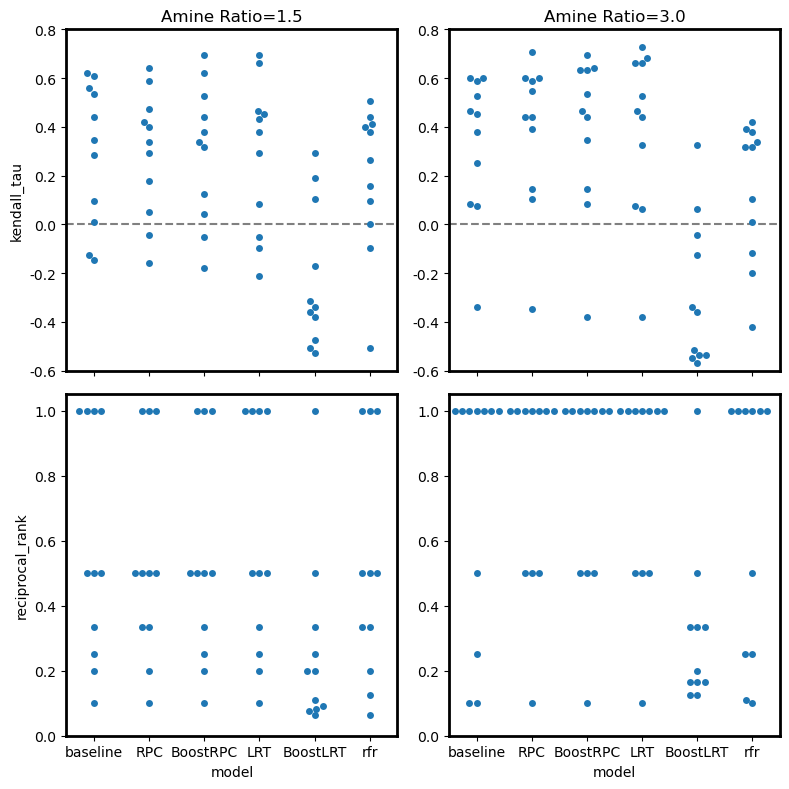

In [10]:
informer_perf_dict = joblib.load("performance_excels/informer_performance_dict_amine_ratio_boost.joblib")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharex=True, tight_layout=True)
for i in range(2) :
    sns.swarmplot(informer_perf_dict[i], x="model", y="kendall_tau", ax=ax[0,i])
    sns.swarmplot(informer_perf_dict[i], x="model", y="reciprocal_rank", ax=ax[1,i])
    ax[0,i].set_ylim(-0.6,0.8)
    ax[0,i].set_yticks([round(x,1) for x in np.arange(-0.6,0.9,0.2)])
    ax[0,i].set_yticklabels([round(x,1) for x in np.arange(-0.6,0.9,0.2)])
    ax[0,i].axhline(0,0,1,c="grey",ls="--")
    ax[1,i].set_ylim(0,1.05)
    ax[1,i].set_yticks([round(x,1) for x in np.arange(0,1.1,0.2)])
    ax[1,i].set_yticklabels([round(x,1) for x in np.arange(0,1.1,0.2)])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[0,i].spines[axis].set_linewidth(2)
        ax[1,i].spines[axis].set_linewidth(2)
ax[0,0].set_title("Amine Ratio=1.5")
ax[0,1].set_title("Amine Ratio=3.0")
ax[0,1].set_ylabel("")
ax[1,1].set_ylabel("")

/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(429.89062500000006, 0.5, '')

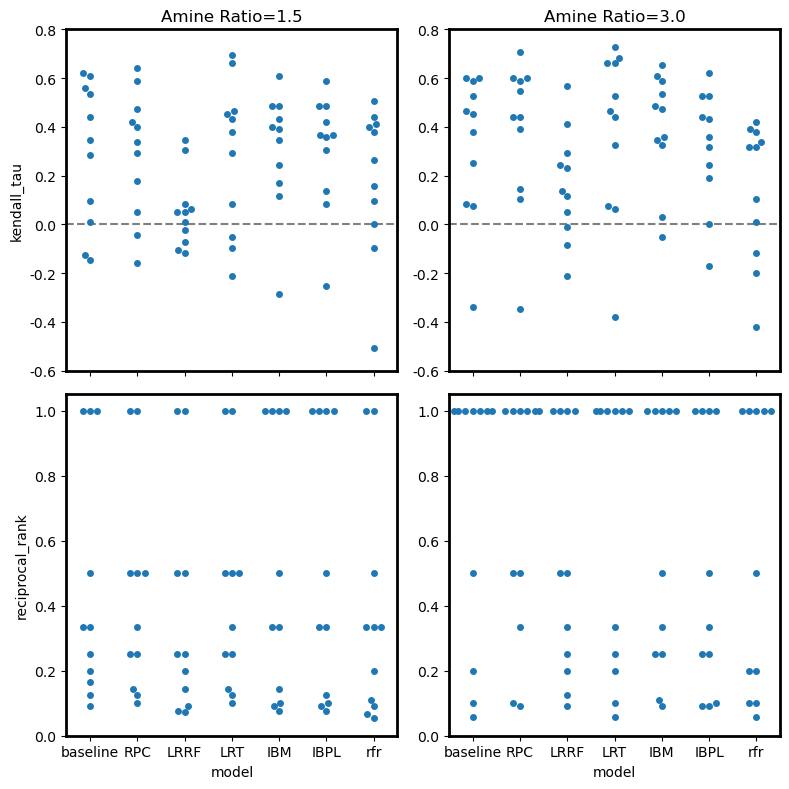

In [9]:
informer_perf_dict = joblib.load("performance_excels/informer_performance_dict_amine_ratio.joblib")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharex=True, tight_layout=True)
for i in range(2) :
    sns.swarmplot(informer_perf_dict[i], x="model", y="kendall_tau", ax=ax[0,i])
    sns.swarmplot(informer_perf_dict[i], x="model", y="reciprocal_rank", ax=ax[1,i])
    ax[0,i].set_ylim(-0.6,0.8)
    ax[0,i].set_yticks([round(x,1) for x in np.arange(-0.6,0.9,0.2)])
    ax[0,i].set_yticklabels([round(x,1) for x in np.arange(-0.6,0.9,0.2)])
    ax[0,i].axhline(0,0,1,c="grey",ls="--")
    ax[1,i].set_ylim(0,1.05)
    ax[1,i].set_yticks([round(x,1) for x in np.arange(0,1.1,0.2)])
    ax[1,i].set_yticklabels([round(x,1) for x in np.arange(0,1.1,0.2)])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[0,i].spines[axis].set_linewidth(2)
        ax[1,i].spines[axis].set_linewidth(2)
ax[0,0].set_title("Amine Ratio=1.5")
ax[0,1].set_title("Amine Ratio=3.0")
ax[0,1].set_ylabel("")
ax[1,1].set_ylabel("")

In [30]:
amine_dfs = [pd.DataFrame(informer_perf_dict[0]), pd.DataFrame(informer_perf_dict[1])]

for amine_df in amine_dfs:
    _, p = friedmanchisquare(
        amine_df[(amine_df["model"]=="baseline")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="RPC")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="LRRF")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="LRT")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="IBM")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="IBPL")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="rfr")]["kendall_tau"].values,
    )
    
    posthoc_p = scikit_posthocs.posthoc_dunn(np.vstack((
        amine_df[(amine_df["model"]=="baseline")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="RPC")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="LRRF")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="LRT")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="IBM")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="IBPL")]["kendall_tau"].values,
        amine_df[(amine_df["model"]=="rfr")]["kendall_tau"].values,
    )), p_adjust="holm")
    print()
    print(p)
    print("Posthoc Bonferroni-Dunn test:", posthoc_p)


0.02399328525092522
Posthoc Bonferroni-Dunn test:           1         2         3         4         5         6    7
1  1.000000  1.000000  0.343501  1.000000  1.000000  1.000000  1.0
2  1.000000  1.000000  0.453469  1.000000  1.000000  1.000000  1.0
3  0.343501  0.453469  1.000000  0.419187  0.235751  0.297434  1.0
4  1.000000  1.000000  0.419187  1.000000  1.000000  1.000000  1.0
5  1.000000  1.000000  0.235751  1.000000  1.000000  1.000000  1.0
6  1.000000  1.000000  0.297434  1.000000  1.000000  1.000000  1.0
7  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.0

0.00028255117030245
Posthoc Bonferroni-Dunn test:           1         2         3         4       5    6         7
1  1.000000  1.000000  0.935534  1.000000  1.0000  1.0  0.935534
2  1.000000  1.000000  0.338978  1.000000  1.0000  1.0  0.338978
3  0.935534  0.338978  1.000000  0.333353  0.4316  1.0  1.000000
4  1.000000  1.000000  0.333353  1.000000  1.0000  1.0  0.334467
5  1.000000  1.000000  0.431600  1.00

In [15]:
posthoc_p.shape

(6, 6)

In [4]:
informer_perf_dict

[{'kendall_tau': [0.6105263157894737,
   0.4210526315789474,
   0.30526315789473685,
   0.3473684210526316,
   0.3684210526315789,
   -0.1473684210526316,
   -0.15789473684210525,
   -0.11578947368421053,
   0.11578947368421053,
   0.08421052631578947,
   0.5368421052631579,
   0.4736842105263158,
   0.08421052631578947,
   0.4842105263157895,
   0.4842105263157895,
   0.28421052631578947,
   0.3368421052631579,
   0.06315789473684211,
   0.24210526315789474,
   0.30526315789473685,
   0.09473684210526316,
   0.17894736842105263,
   -0.0736842105263158,
   0.16842105263157894,
   0.1368421052631579,
   0.4421052631578947,
   0.39999999999999997,
   0.010526315789473684,
   0.39999999999999997,
   0.3684210526315789,
   -0.12631578947368421,
   -0.042105263157894736,
   -0.10526315789473685,
   -0.28421052631578947,
   -0.25263157894736843,
   0.6210526315789474,
   0.5894736842105264,
   0.3473684210526316,
   0.6105263157894737,
   0.5894736842105264,
   0.5578947368421052,
   0.64210

In [31]:
informer_perf_dict = joblib.load("performance_excels/informer_performance_dict_catalyst_ratio.joblib")

/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packa

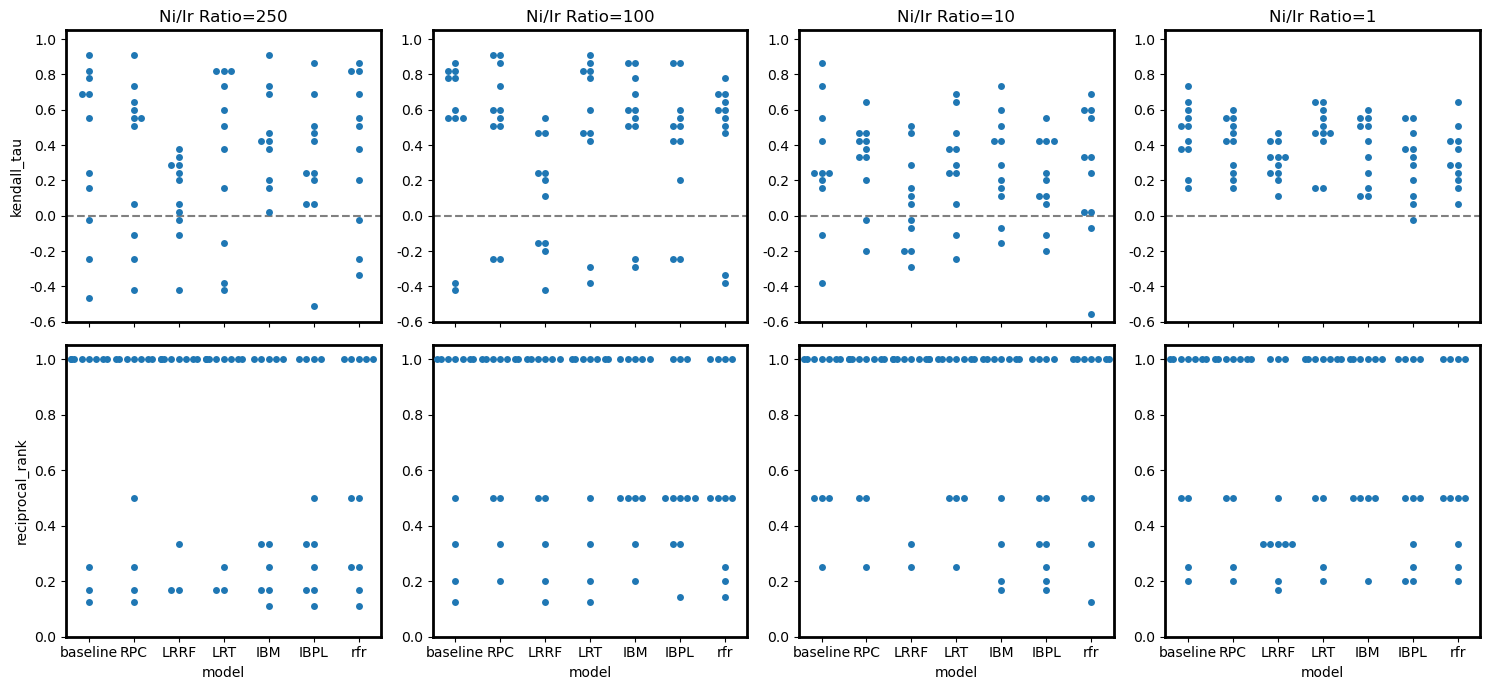

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,7), sharex=True, tight_layout=True)
for i in range(4) :
    sns.swarmplot(informer_perf_dict[i], x="model", y="kendall_tau", ax=ax[0,i])
    sns.swarmplot(informer_perf_dict[i], x="model", y="reciprocal_rank", ax=ax[1,i])
    ax[0,i].set_ylim(-0.6,1.05)
    ax[0,i].set_yticks([round(x,1) for x in np.arange(-0.6,1.1,0.2)])
    ax[0,i].set_yticklabels([round(x,1) for x in np.arange(-0.6,1.1,0.2)])
    ax[0,i].axhline(0,0,1,c="grey",ls="--")
    ax[1,i].set_ylim(0,1.05)
    ax[1,i].set_yticks([round(x,1) for x in np.arange(0,1.1,0.2)])
    ax[1,i].set_yticklabels([round(x,1) for x in np.arange(0,1.1,0.2)])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[0,i].spines[axis].set_linewidth(2)
        ax[1,i].spines[axis].set_linewidth(2)
ax[0,0].set_title("Ni/Ir Ratio=250")
ax[0,1].set_title("Ni/Ir Ratio=100")
ax[0,2].set_title("Ni/Ir Ratio=10")
ax[0,3].set_title("Ni/Ir Ratio=1")
for i in range(1,4):
    ax[0,i].set_ylabel("")
    ax[1,i].set_ylabel("")

/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/label/lib/python3.10/site-packag

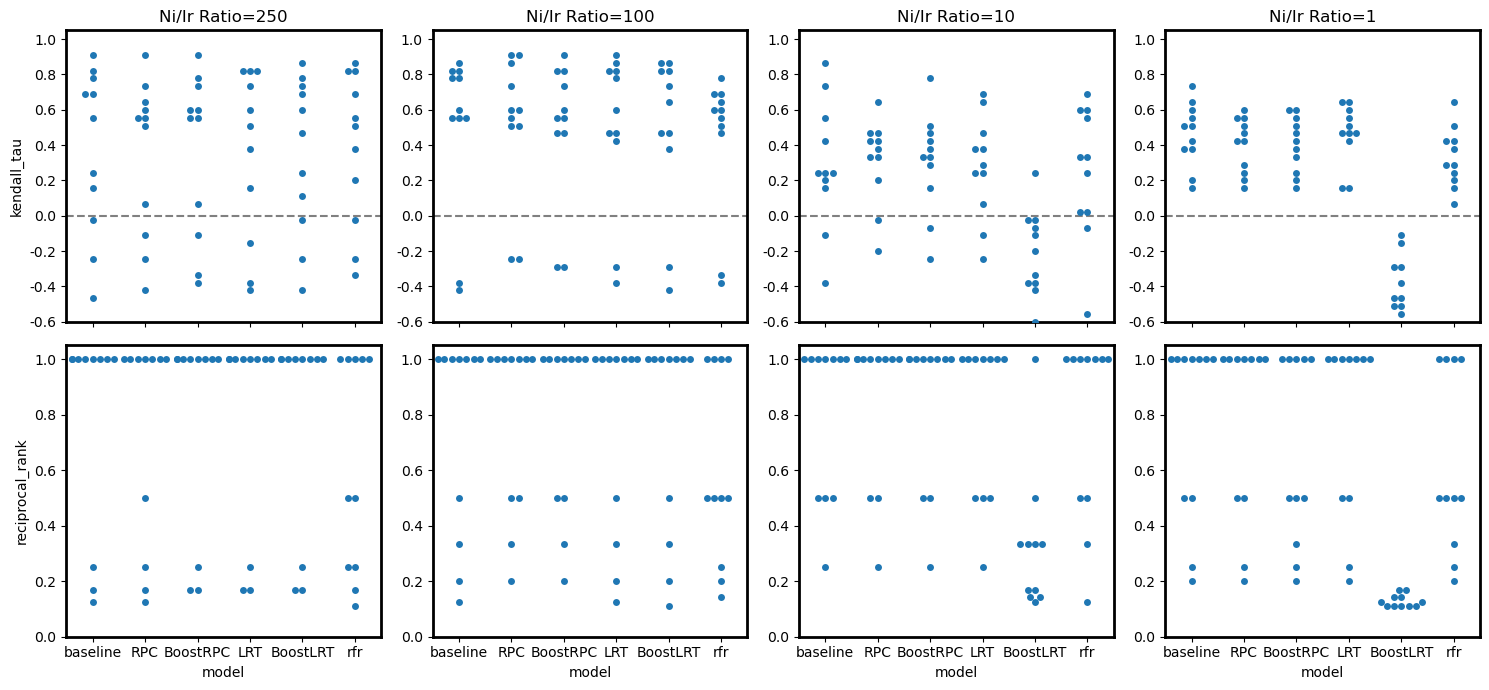

In [14]:
informer_perf_dict = joblib.load("performance_excels/informer_performance_dict_catalyst_ratio_boost.joblib")
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,7), sharex=True, tight_layout=True)
for i in range(4) :
    sns.swarmplot(informer_perf_dict[i], x="model", y="kendall_tau", ax=ax[0,i])
    sns.swarmplot(informer_perf_dict[i], x="model", y="reciprocal_rank", ax=ax[1,i])
    ax[0,i].set_ylim(-0.6,1.05)
    ax[0,i].set_yticks([round(x,1) for x in np.arange(-0.6,1.1,0.2)])
    ax[0,i].set_yticklabels([round(x,1) for x in np.arange(-0.6,1.1,0.2)])
    ax[0,i].axhline(0,0,1,c="grey",ls="--")
    ax[1,i].set_ylim(0,1.05)
    ax[1,i].set_yticks([round(x,1) for x in np.arange(0,1.1,0.2)])
    ax[1,i].set_yticklabels([round(x,1) for x in np.arange(0,1.1,0.2)])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[0,i].spines[axis].set_linewidth(2)
        ax[1,i].spines[axis].set_linewidth(2)
ax[0,0].set_title("Ni/Ir Ratio=250")
ax[0,1].set_title("Ni/Ir Ratio=100")
ax[0,2].set_title("Ni/Ir Ratio=10")
ax[0,3].set_title("Ni/Ir Ratio=1")
for i in range(1,4):
    ax[0,i].set_ylabel("")
    ax[1,i].set_ylabel("")

In [44]:
smiles = pd.read_excel("datasets/Informer.xlsx", sheet_name="smiles", header=None)
[x[0] for x in smiles.values.tolist()]

['O=C1NC2=CC(Br)=CC3=C2N(C(CC(OC)=O)CC3)C1=O',
 'O=C(N(C)C1)C2=CC(Br)=CC=C2N3C1=C(C(OCC)=O)N=C3',
 'BrC1=CC=C(OC2=C(C3=CC=C(S(C)(=O)=O)C=C3)C(C)(C)OC2=O)N=C1',
 'BrC1=CC=C(F)C2=C1CN(C(O[C@H]3CN(C(OC(C)(C)C)=O)[C@H](C(OC)=O)C3)=O)C2',
 'BrC1=CC(C(C([C@H]2N(C(OCC3=CC=CC=C3)=O)CCC2)=O)=CN4)=C4C=C1',
 'BrC(C=N1)=CC2=C1/C(C3=CC=C(Cl)C=C3CC2)=C4CCN(C(OCC)=O)CC\\4',
 'ClC(C=C1)=CC=C1CN2C3=C(Br)C=C(F)C=C3C4C2[C@@H](CC(O)=O)CC4',
 'O=C(O[C@H]1CN(C(OCC2=CC=CC=C2)=O)[C@H](C(OC)=O)C1)N3CC4=CC=CC=C4C3',
 'BrC1=C(OC2CCN(C3=NOC(C4=NN(CC(O)=O)N=N4)=C3)CC2)C=C(F)C=C1',
 'OC1=C(C(NCC2=CC=C(F)C=C2)=O)N=C(Br)C3=CC=CN=C31',
 'CC1=CC(C#N)=CC(C)=C1OC2=NC(NC3=CC=C(C#N)C=C3)=NC(N)=C2Br',
 'O=C1C2C(N=C(N[C@@H]3CCC[C@H]3O)N2CC4=CC=C(OC)C(Br)=C4)N(CCO)C(N1CC)=O',
 'BrC1=CSC([C@]2(C)CC(N(C)/C(N2)=N\\C(OC(C)(C)C)=O)=O)=C1',
 'O=C1O[C@@H](CN2C=CN=N2)CN1C3=CC(F)=C(I)C=C3',
 'CCCC(N(CC1=CC=C(C2=C(S(NC(C)(C)C)(=O)=O)C=CC=C2)C=C1)C3=O)=NC4=C3C=C(I)C=C4',
 'CC(NC(C)=O)(C)[C@H](CC12CCN(C(OC(C)(C)C)=O)CC2)C3=C1C=CC=C3',
 '

In [32]:
desc_df = pd.read_excel("datasets/Informer.xlsx", sheet_name="descriptors", usecols=[0,1,2,3,4])
desc_df

,Ered (3*->2),(2 -> 3),Imax,Ni:Ir,Amine ratio
0,1.21,1.37,380,250,1.5
1,1.21,1.37,380,100,1.5
2,1.21,1.37,380,10,1.5
3,1.21,1.37,380,1,1.5
4,1.21,1.37,380,250,3.0
...,...,...,...,...,...
75,2.30,1.27,325,1,1.5
76,2.30,1.27,325,250,3.0
77,2.30,1.27,325,100,3.0
78,2.30,1.27,325,10,3.0


In [30]:
informer_df = pd.read_excel("datasets/Informer.xlsx").iloc[:80,:]

print(informer_df.shape)
informer_df["Catalyst"] = np.repeat(np.arange(1,11), 8)
informer_df["Ni_Ir_ratio"] = np.tile(np.array([250,100,10,1]), 20)
informer_df["Amine_ratio"] = np.tile(np.array([1.5,1.5,1.5,1.5,3,3,3,3]),10)
informer_df = informer_df.pivot_table(index=["Catalyst", "Ni_Ir_ratio", "Amine_ratio"])

# Dropping compounds where all yields are below 20%
cols_to_erase = []
for col in informer_df.columns :
    if np.all(informer_df.loc[:,col].to_numpy() < 20) :
        cols_to_erase.append(col)

print(cols_to_erase)

informer_df = informer_df.loc[:, [x for x in range(1,19) if x not in cols_to_erase]]
informer_df # --> 11 substrates
# 

(80, 18)
[1, 7, 9, 10, 16, 17, 18]


2   3   4   5   6   8  11  12  13  14   15
Catalyst Ni_Ir_ratio Amine_ratio                                             
1        1           1.5          37   0   4   0  15  22   5   2   4  26   16
                     3.0          42   0   2   1  28   7   0   3   0  23   22
         10          1.5          60   2  34   6  30  52   0  52  29  68   29
                     3.0          70   1  36  15  60  26   0  72  45  76   29
         100         1.5          55  19  31   9   2  62   1  49  30  68   47
...                               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...
10       10          3.0           1  17   0   1   0   2   0   0   0  28   68
         100         1.5           0  16   0   0   0   0   0   0   0  23   49
                     3.0           0  24   0   0   0   2   0   0   0  43  100
         250         1.5           0  19   0   0   0   0   0   0   0  18   70
                     3.0           0  22   0   0   0   7   0   0   0  32  100

[80 rows x 11 columns]

<Axes: >

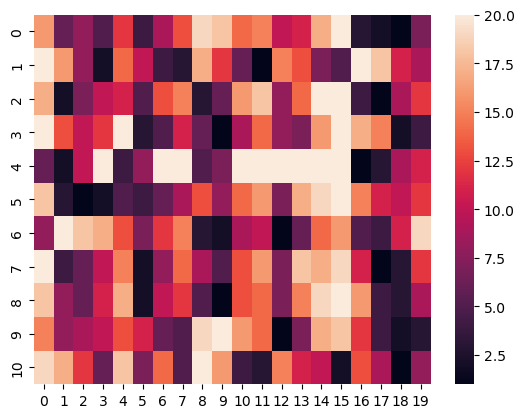

In [50]:
from dataset_utils import *
sub_df1 = informer_df.query("Amine_ratio == 1.5").iloc[:20,:]
sns.heatmap(yield_to_ranking(sub_df1.to_numpy().T))